# House Price prediction
## a) Get familiar with data
We can read csv file using pandas **read_csv** function. Get first rows of data with calling **head** function on dataframe.Also get data summary with **describe** function.

#### Imports

In [1]:
import pandas as pd

In [2]:
csv_path= "./houses.csv"
houses_data = pd.read_csv(csv_path)
houses_data.head()

,Id,MSSubClass,LotArea,LotConfig,OverallQual,LotFrontage,Neighborhood,OverallCond,BedroomAbvGr,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,SalePrice
0,1,60,8450,Inside,7,65.0,CollgCr,5,3,8,856,2003,208.5
1,2,20,9600,FR2,6,80.0,Veenker,8,3,6,1262,1976,181.5
2,3,60,11250,Inside,7,68.0,CollgCr,5,3,6,920,2001,223.5
3,4,70,9550,Corner,7,60.0,Crawfor,5,3,7,756,1915,140.0
4,5,60,14260,FR2,8,84.0,NoRidge,5,4,9,1145,2000,250.0


In [3]:
houses_data.describe()

,Id,MSSubClass,LotArea,OverallQual,LotFrontage,OverallCond,BedroomAbvGr,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,SalePrice
count,1134.000000,1134.000000,1134.000000,1134.000000,937.00000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000
mean,622.062610,54.056437,9487.280423,6.065256,68.40555,5.551146,2.828924,6.354497,1032.037037,1972.981481,174.783949
std,359.623823,38.760477,3866.279692,1.294012,20.13204,1.015560,0.734241,1.441257,385.301916,28.432646,65.428985
min,1.000000,20.000000,1300.000000,2.000000,21.00000,3.000000,1.000000,3.000000,0.000000,1885.000000,34.900000
25%,310.250000,20.000000,7508.750000,5.000000,59.00000,5.000000,2.000000,5.000000,796.000000,1955.000000,129.925000
50%,623.500000,50.000000,9246.500000,6.000000,70.00000,5.000000,3.000000,6.000000,990.000000,1975.000000,161.875000
75%,932.750000,60.000000,11250.000000,7.000000,80.00000,6.000000,3.000000,7.000000,1262.000000,2001.000000,207.500000
max,1243.000000,180.000000,39104.000000,10.000000,134.00000,8.000000,5.000000,11.000000,2223.000000,2009.000000,415.298000


### Categorial features
We can map categorial features to numerical values. For example, we have 4 classes and for each of them we map one number from 1 to 4. This technic's problem is our model relate closer values and learn from it.<br>
For refine this problem, we expand categorial features to multiple binary features. (One hot implementation.In our example, we expand our feature to four features and each one we have 0/1 for having or not having that feature. <br>
In this project, we remove this features(columns) with pandas **drop** function. (Neighborhood, LotConfig, MSSubClass)<br>
>MSSubClass: Identifies the type of dwelling involved in the sale.<br>
>LotConfig: Lot configuration<br>
>Neighborhood: Physical locations within Ames city limits

In [4]:
houses_data.drop(["LotConfig", "Neighborhood"], axis=1, inplace=True)

In [5]:
houses_data.head()

,Id,MSSubClass,LotArea,OverallQual,LotFrontage,OverallCond,BedroomAbvGr,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,SalePrice
0,1,60,8450,7,65.0,5,3,8,856,2003,208.5
1,2,20,9600,6,80.0,8,3,6,1262,1976,181.5
2,3,60,11250,7,68.0,5,3,6,920,2001,223.5
3,4,70,9550,7,60.0,5,3,7,756,1915,140.0
4,5,60,14260,8,84.0,5,4,9,1145,2000,250.0


### Replacing missing(NaN) values with column mean
We can do it by calling **fillna** function on dataframe. It get a dictionary as argument for filling respective NaN values in columns.

In [6]:
houses_data.fillna(houses_data.mean())

,Id,MSSubClass,LotArea,OverallQual,LotFrontage,OverallCond,BedroomAbvGr,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,SalePrice
0,1,60,8450,7,65.00000,5,3,8,856,2003,208.500
1,2,20,9600,6,80.00000,8,3,6,1262,1976,181.500
2,3,60,11250,7,68.00000,5,3,6,920,2001,223.500
3,4,70,9550,7,60.00000,5,3,7,756,1915,140.000
4,5,60,14260,8,84.00000,5,4,9,1145,2000,250.000
5,6,50,14115,5,85.00000,5,1,5,796,1993,143.000
6,7,20,10084,8,75.00000,5,3,7,1686,2004,307.000
7,8,60,10382,7,68.40555,6,3,7,1107,1973,200.000
8,9,50,6120,7,51.00000,5,2,8,952,1931,129.900
9,11,20,11200,5,70.00000,5,3,5,1040,1965,129.500


### Relations between features and house price
In this part, we draw an **scatter_plot** for each numerical feature vs. house price to find out correlation between features and house price. <br>

In [7]:
import matplotlib.pyplot as plt

def plot_features_correlations_with_price(dataframe):
    fig, axs = plt.subplots(3, 3, figsize=(20,20))
    fig.suptitle('Featues correlation')
    features = dataframe.columns[1:-1]
    for i in range(3):
        for j in range(3):
#             axs[i,j].set_title("House price - " + features[i*3+j])
            axs[i,j].set_xlabel(features[i*3+j])
            axs[i,j].set_ylabel("Sale Price")
            axs[i,j].scatter(dataframe[features[i*3 + j]], dataframe["SalePrice"])
plot_features_correlations_with_price(houses_data)

### Relations conclusion
We can see that, OverallQual has a almost linear relation with house price. So we choose it as our feature.
>OverallQual: Overall material and finish quality

## b) Linear regressor
In linear models, a linear equation $ y = wx + b$ describe relations between features and final values. _w_ is slope of model an _b_ is bias. <br>
In general form, they are vectors but in this project, we choose the most correlated feature for input and estimate house price by that feature.<br>
By the top figures, OverallQual is the most linear correlated feature. So we try to calculate slope and bias for this feature to have close estimate to real value.

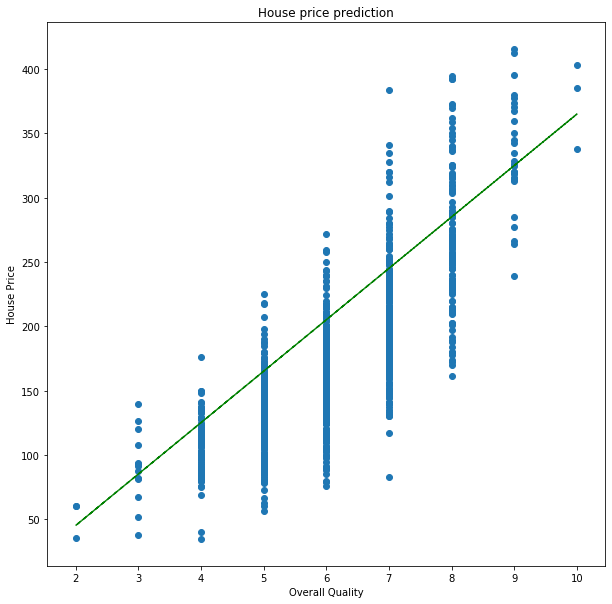

In [8]:
w = 40
b = -35
x = houses_data["OverallQual"]
estimated_values = w * x + b

# Change figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
# Plotting
plt.title("House price prediction")
plt.xlabel("Overall Quality")
plt.ylabel("House Price")
plt.plot(x, estimated_values, 'g--')
plt.scatter(x, houses_data["SalePrice"])

In the above code, tuning slope and bias by hand make estimated line similiar to real values.<br>
Now we should calculate __RMSE__ to tune the error in the minimum state. It should be under 90. <br>
We can __RMSE__ definition in below function.

In [9]:
import math
def rmse(predictions, target):
    temp = 0
    size = len(predictions)
    for i in range(size):
        temp += ((predictions[i] - target[i])**2)
    mean = temp / size
    rmse = mean ** (1/2)
    return rmse
    
def find_best_params(x, real_values):
    min_rmse = math.inf
    best_w = 0
    best_b = 0
    for w in range(100):
        for b in range(0,-100,-1):
            estimated_values = w * x + b
            new = rmse(estimated_values, real_values)
            if new < min_rmse:
                min_rmse = new
                best_b = b
                best_w = w
    return best_b, best_w, min_rmse

x = houses_data["OverallQual"]
real_values = houses_data["SalePrice"]
print(find_best_params(x, real_values))

KeyboardInterrupt: 

In the above code, __rmse__ function calculate rmse value. In __find_best_params__ function, with for loop we try diffrent values for _w_ and _b_.
#### In the below part, best linear estimation comes beside real data. The best value for w is 41 and for b is -74 . RMSE value for this parameters is 38.54 .

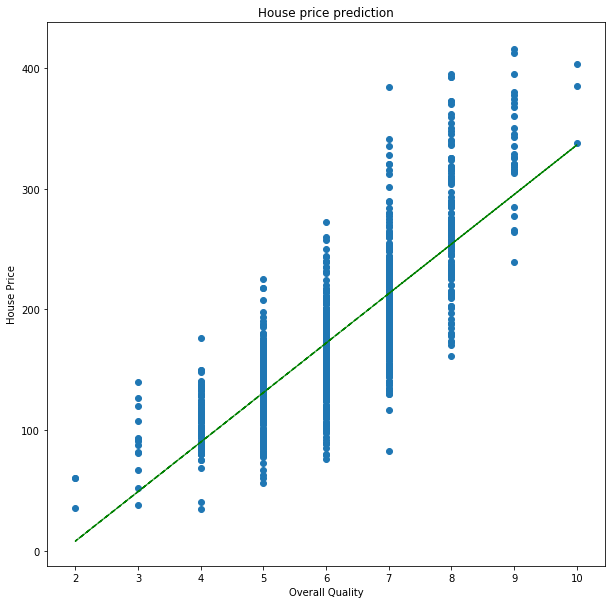

In [10]:
w = 41
b = -74
estimated_values = w * x + b

# Change figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
# Plotting
plt.title("House price prediction")
plt.xlabel("Overall Quality")
plt.ylabel("House Price")
plt.plot(x, estimated_values, 'g--')
plt.scatter(x, houses_data["SalePrice"])

## d) Vectorize part b
#### Calculate RMSE

In [11]:
import numpy as np

def vectorized_rmse(predictions, target):
    return np.sqrt(np.mean((predictions-target)**2))

w = 41
b = -74
x = houses_data["OverallQual"]
estimated_values = w * x + b
real_values = houses_data["SalePrice"]
print("RMSE value is:", vectorized_rmse(estimated_values, real_values))

RMSE value is: 38.547321763483986


## e) KNN regression
At first, we should standardize our dataset. For each feature, calculate _min_ and _max_ anf then overwrite below values. <br>
<h2><center> $standardValue = {{Value - Min} \over {Max - Min}}$ </center></h2><br>
We create training dataset that only contains features. (Dropping Id and SalePrice)

In [12]:
# standardize dataframe
training_house_data = houses_data.drop(["Id", "SalePrice"], axis=1, inplace=False)
standard_training_data = (training_house_data - training_house_data.min()) / (training_house_data.max() - training_house_data.min())
standard_training_data

,MSSubClass,LotArea,OverallQual,LotFrontage,OverallCond,BedroomAbvGr,TotRmsAbvGrd,TotalBsmtSF,YearBuilt
0,0.25000,0.189133,0.625,0.389381,0.4,0.50,0.625,0.385065,0.951613
1,0.00000,0.219553,0.500,0.522124,1.0,0.50,0.375,0.567701,0.733871
2,0.25000,0.263200,0.625,0.415929,0.4,0.50,0.375,0.413855,0.935484
3,0.31250,0.218231,0.625,0.345133,0.4,0.50,0.500,0.340081,0.241935
4,0.25000,0.342821,0.750,0.557522,0.4,0.75,0.750,0.515070,0.927419
5,0.18750,0.338985,0.375,0.566372,0.4,0.00,0.250,0.358075,0.870968
6,0.00000,0.232356,0.750,0.477876,0.4,0.50,0.500,0.758435,0.959677
7,0.25000,0.240239,0.625,NaN,0.6,0.50,0.500,0.497976,0.709677
8,0.18750,0.127500,0.625,0.265487,0.4,0.25,0.625,0.428250,0.370968
9,0.00000,0.261877,0.375,0.433628,0.4,0.50,0.250,0.467836,0.645161


### Predicting new instances
__predict_knn__ function get a single row dataframe that contains new house features and outputs target sale price. <br>
This Function do the below steps:
1. Standardize input : We standardize input values to resolve feature diffrent sizes. We do it by min-max-normalizer as we see in upper functions. 
2. Calculate euclidian distance: We calculate feature for each row by below formula.
<h2><center> $$ \sqrt {{1 \over N} \sum_{n=1}^{N} (x_i - y_i)^2} $$ </center></h2><br>
3. Find k smallest indexes: We find points that have leat distance to target. We use __argpartiotion__ function that sort only first k values(ascending).
4. Find k smallest values
5. Get mean of this values and report for target value
##### This is KNN regression. Predict target value by it's neighbour values.

In [13]:
# Instance example data
columns = ['LotArea', 'OverallQual', 'LotFrontage', 'OverallCond', 
           'BedroomAbvGr', 'TotRmsAbvGrd', 'TotalBsmtSF', 'YearBuilt']
row_data = [11435,8,67.66037735849056,7,3,7,792,1929]
# new_house = [50, 9000, 7, 70, 6, 3, 7, 800, 2000]
singular_df = pd.DataFrame(data = [row_data], columns = columns)

def predict_knn(house_data):
#     csv_path= "./houses.csv"
#     houses_data = pd.read_csv(csv_path)
#     houses_data.drop(["LotConfig", "Neighborhood"], axis=1, inplace=True)
#     houses_data.fillna(houses_data.mean())
#     training_house_data = houses_data.drop(["Id", "SalePrice"], axis=1, inplace=False)
#     standard_training_data = (training_house_data - training_house_data.min()) / (training_house_data.max() - training_house_data.min())
    k = 10
    # standardize input
    standard_house_data = np.array(
        (house_data - training_house_data.min()) / (training_house_data.max() - training_house_data.min()))
    # calculate distance vector
    diff_power_2 = (standard_training_data - standard_house_data) ** 2
    distance = np.sqrt(diff_power_2.sum(axis=1))
    # find k smallest index
    idx = np.argpartition(distance, k)[:k]
    # find 10 smallest vector 
    k_smallest = houses_data['SalePrice'][idx]
    # get mean and generate output
    return np.mean(k_smallest)
print(predict_knn(singular_df))

156.79000000000002


In [15]:
from typing import Callable

import numpy as np
import pandas as pd


def preprocess_df(df):
    df = df.fillna(df.mean()).drop(columns='Id')
    numeric_indexes = [i for i, dtype in enumerate(df.dtypes) if dtype == np.float or dtype == np.int]
    return df.iloc[:, numeric_indexes]

def evaluate(model: Callable, plot_against: str = None) -> float:
    test_data_adr = './test.csv'
    test_data = preprocess_df(pd.read_csv(test_data_adr))

    predictions = []
    for i, row in test_data.iterrows():
        row_df = pd.DataFrame(data=row.values, index=row.index).transpose()
        row_df = row_df.drop(columns='SalePrice')
        predictions.append(model(row_df))
    predictions = np.array(predictions)
    ground_truth = test_data['SalePrice']
    rms_error = (np.sum((predictions - ground_truth) ** 2) / test_data.shape[0]) ** 0.5

    if plot_against:
        plt.plot(test_data[plot_against], predictions, 'o')
        plt.plot(test_data[plot_against], test_data['SalePrice'], 'o')

    return rms_error

In [16]:
evaluate(predict_knn)

32.366869858956086